# Hypothesen Tests
In diesem Notebook versuchen wir uns die meisten der Hypothesen anzuschauen, die vor der Datenerhebung erstellt worden sind. Die Wahl der Methoden die hier angewendet werden und die Gründe dafür werden in der folgenden Quelle ausführlicher beschrieben:

- https://bookdown.org/Rmadillo/likert/

Zusammenfassen lässt sich der Umgang mit dem Datensatz wie folgt:
 - Mittelwert Vergleiche mit Likert Skala Daten funktionieren meist nicht gut, da die Abstände zwischen den Wahloptionen nicht klar definiert sind (Wie groß ist der Unterschied zwischen Option 2 und 1 ?). In diesem Datensatz kommt dazu noch das Problem, das aus UX Gründen eine neutrale Wahloption ausgeschlossen wurde. Deshalb lassen sich Methoden die Mittelwerte vergleichen hier nicht korrekt anwenden.
 - Viele Hypothesentests werden bei kleineren Unterschieden zwischen den Gruppen signifikanter, je größer der Datensatz ist. Bei der Größe unseres Datensatzes sollte man sich deshalb nicht auf klassische Hypothesentests verlassen. Eine Kombination aus Visualisierung, Konfidenzintervalle und Proportional Odds Regression sollen deshalb helfen, Unterschiede fest zu stellen.
 - Da die Merkmale im Datensatz nicht für alle Gruppen und Hypothesen gleich verteilt sind, werden zudem die Größe der Gruppen visualisiert.

In [1]:
import pandas as pd
from src.visualization.visualize import likert_plot
from src.data import load_full_data
from src.exploration.explore import test_hypothesis, build_likelihood_ratio_test
from pylab import rcParams
rcParams['figure.figsize'] = 14, 5

### Notes:
- MS = HVS
- CP = Seitenraum
- SE = NVS

In [2]:
full_data_df = load_full_data()
bike_data = {}
bike_data["ms"] = full_data_df[full_data_df["Experiment"] == "MS"].dropna(axis=1, how="all")
bike_data["ms"] = bike_data["ms"][bike_data["ms"]["Kamera"] == "C"]
bike_data["cp"] = full_data_df[full_data_df["Experiment"] == "CP"].dropna(axis=1, how="all")
bike_data["cp"] = bike_data["cp"][bike_data["cp"]["Kamera"] == "C"]
bike_data["se"] = full_data_df[full_data_df["Experiment"] == "SE"].dropna(axis=1, how="all")
bike_data["se"] = bike_data["se"][bike_data["se"]["Kamera"] == "C"]

# Haupthypothesen - Aus Radperspektive

### 1. RVA im Seitenraum werden immer als sicher empfunden.

Diese Hypothese testen wir vor allem für die Radfahrer und dann für alle Verkehrsteilnehmer

<Figure size 432x288 with 0 Axes>

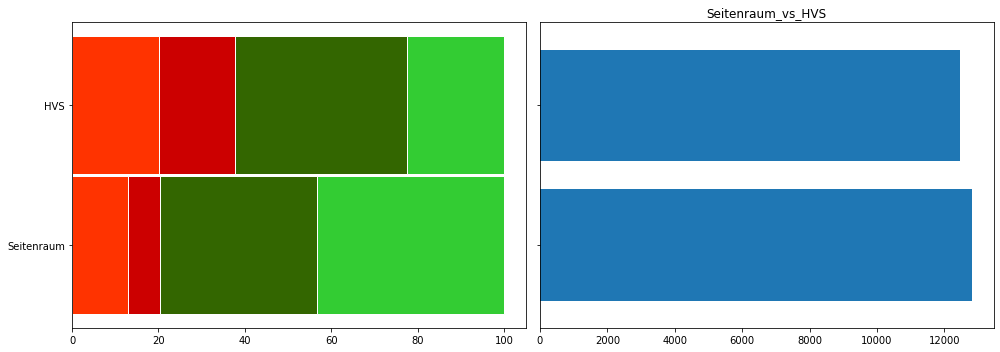

Mittelwert von  Seitenraum - 2.351341863005149
Mittelwert von  HVS - 1.947028631004892
Bootstrap Ergebnis: 25.0    (25.0, 25.0)
Unterschied im Mittelwert von Seitenraum zu HVS (in Prozent) 20.7656541646018
Ist der Unterschied signifikant? True


In [3]:
group1 = bike_data["cp"][["rating", "sessionID"]]
group2 = bike_data["ms"][["rating", "sessionID"]]
df = bike_data["cp"].copy().append(bike_data["ms"])
test_hypothesis(group1, group2, "Seitenraum_vs_HVS", ["Seitenraum", "HVS"])

### 2. Durch farbige Unterscheidung der Radverkehrsanlage wird sie als sicherer empfunden.

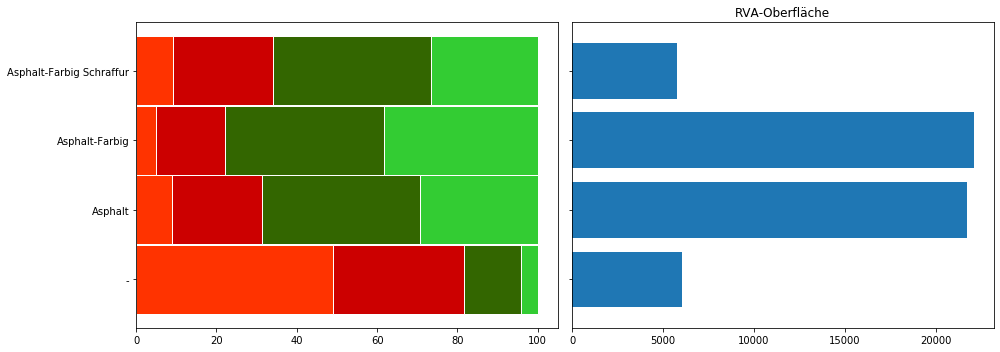

In [4]:
df = bike_data["ms"]
likert_plot(df[["RVA-Oberfläche", "rating"]])

<Figure size 432x288 with 0 Axes>

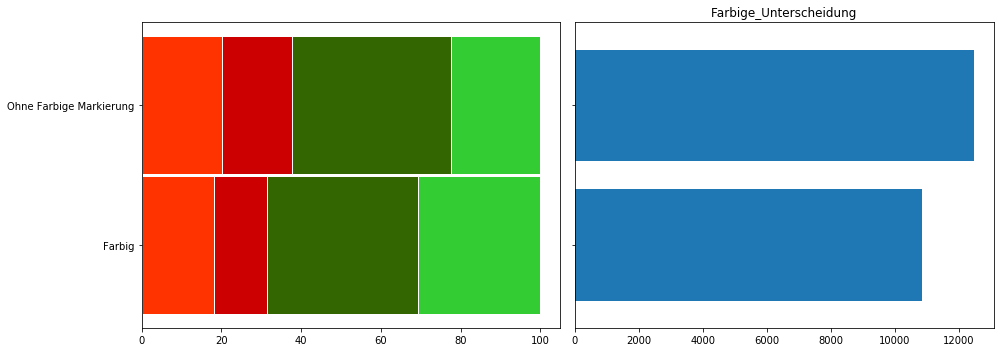

Mittelwert von  Farbig - 2.12129168969965
Mittelwert von  Ohne Farbige Markierung - 1.947028631004892
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Farbig zu Ohne Farbige Markierung (in Prozent) 8.95020524710097
Ist der Unterschied signifikant? True
Ergebnis Likelihood Ratio Test: Signifikanter Unterschied


In [5]:
df = bike_data["ms"].copy()
group1 = df[(df["RVA-Oberfläche"] == "Asphalt-Farbig") |
            (df["RVA-Oberfläche"] == "Asphalt-Farbig Schraffur")][["rating", "sessionID"]]
group2 =  df[~(df["RVA-Oberfläche"] == "Asphalt-Farbig") |
             ~(df["RVA-Oberfläche"] == "Asphalt-Farbig Schraffur")][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Farbige_Unterscheidung", ["Farbig", "Ohne Farbige Markierung"])
build_likelihood_ratio_test(df, "RVA-Oberfläche")

### 3. Durch Poller oder parkende KfZ Ggeschützte RVAs werden immer als sicher empfunden.

<Figure size 432x288 with 0 Axes>

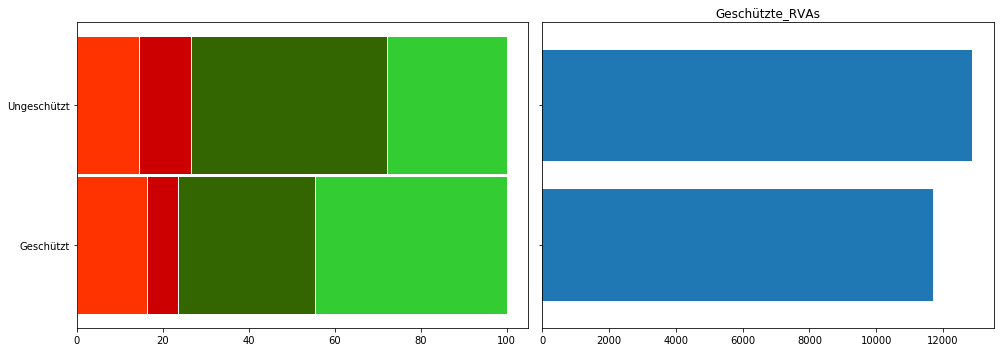

Mittelwert von  Geschützt - 2.369498333475771
Mittelwert von  Ungeschützt - 2.11358868774765
Bootstrap Ergebnis: 25.0    (25.0, 25.0)
Unterschied im Mittelwert von Geschützt zu Ungeschützt (in Prozent) 12.107826239400994
Ist der Unterschied signifikant? True


In [6]:
df1 = bike_data["ms"].copy()
df1_group = df1[df1["Tr_li-baulTrennung"].isin(["Sperrpfosten-niedrig", "Sperrpfosten-hoch"])]
df1_others = df1[~(df1.index.isin(df1_group.index))]
df2 = bike_data["cp"].copy()
df2_group = df2[df2["Links_RVA"] == "Parken"]
df2_others = df2[~(df2.index.isin(df2_group.index))]
group1 = df1_group.append(df2_group)
group2 = df1_others.append(df2_others)
test_hypothesis(group1, group2, "Geschützte_RVAs", ["Geschützt", "Ungeschützt"])

### 4. Nebenstraßen werden sicherer empfunden als Hauptverkehrsstraßen.

<Figure size 432x288 with 0 Axes>

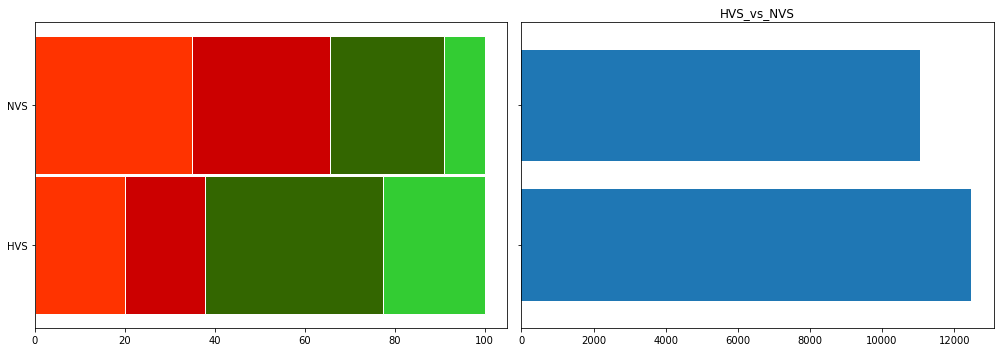

Mittelwert von  HVS - 1.947028631004892
Mittelwert von  NVS - 1.3227556278817467
Bootstrap Ergebnis: 100.0    (100.0, 100.0)
Unterschied im Mittelwert von HVS zu NVS (in Prozent) 47.19488543192612
Ist der Unterschied signifikant? True


In [7]:
group1 = bike_data["ms"][["rating", "sessionID"]]
group2 = bike_data["se"][["rating", "sessionID"]]
test_hypothesis(group1, group2, "HVS_vs_NVS", ["HVS", "NVS"])

### 5. Wenn die Breite der RVA, die Regelmaße überschreitet, werden diese als sicherer empfunden.

<Figure size 432x288 with 0 Axes>

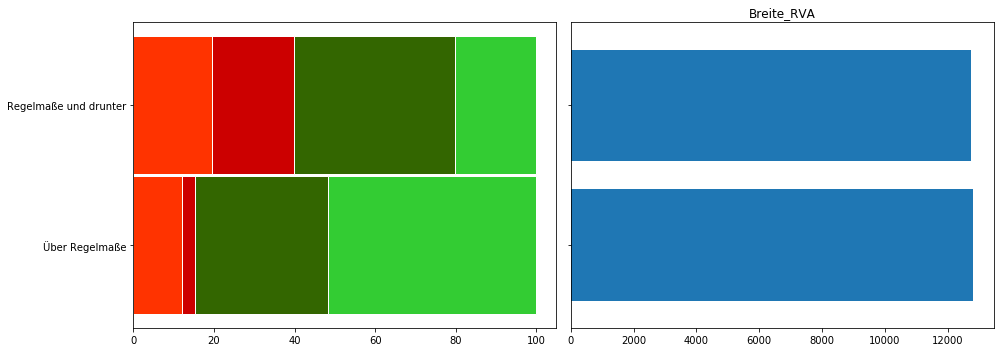

Mittelwert von  Über Regelmaße - 2.50390046025431
Mittelwert von  Regelmaße und drunter - 1.9019138755980862
Bootstrap Ergebnis: 50.0    (50.0, 50.0)
Unterschied im Mittelwert von Über Regelmaße zu Regelmaße und drunter (in Prozent) 31.651621683811513
Ist der Unterschied signifikant? True


In [43]:
df = bike_data["ms"].copy().append(bike_data["cp"], sort=False)
group1 = df[df["RVA-Breite"] == 3.5][["rating", "sessionID"]]
group2 = df[(df["RVA-Breite"] == 2)][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite_RVA", ["Über Regelmaße","Regelmaße und drunter"])

### 6. Ab einer gewissen Breite der RVA wird diese, egal in welcher Situation, als sicher empfunden.

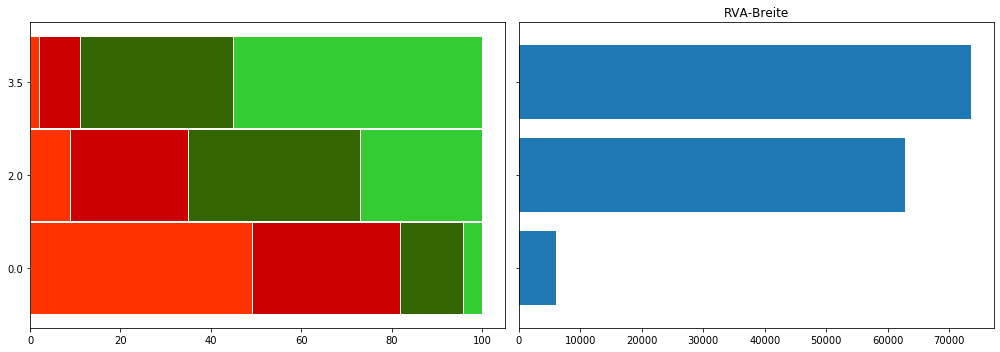

In [44]:
df1 = bike_data["ms"].copy()
df2 = bike_data["cp"].copy()
merged_df = df1[["RVA-Breite", "rating", "sessionID"]]
merged_df = merged_df.append(df2[["RVA-Breite", "rating", "sessionID"]])
likert_plot(merged_df[["RVA-Breite", "rating"]], filename_prefix="hypo6")

### 7. Ist die gesamte, dem Radverkehr zur Verfügung stehende, Fläche breiter, wird diese als sicherer empfunden.

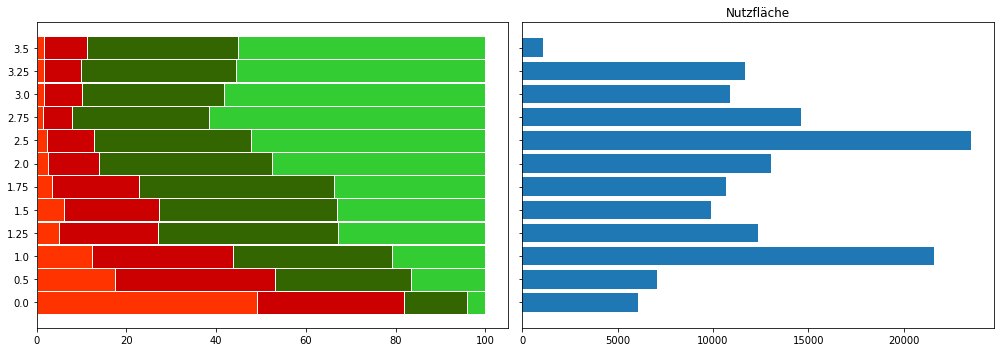

In [45]:
df1 = bike_data["ms"].copy()
df2 = bike_data["cp"].copy()
likert_plot(df1.append(df2)[["Nutzfläche", "rating"]])

### 8. Ab einer gewissen baulichen Trennung der RVA wird diese, egal in welcher Situation, als sicher empfunden.

<Figure size 432x288 with 0 Axes>

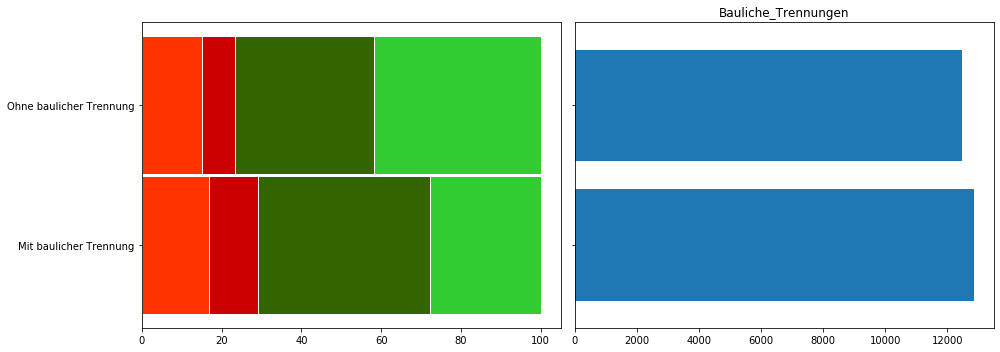

Mittelwert von  Mit baulicher Trennung - 2.1182766404608078
Mittelwert von  Ohne baulicher Trennung - 2.326673086181993
Bootstrap Ergebnis: -20.0    (-40.0, -20.0)
Unterschied im Mittelwert von Mit baulicher Trennung zu Ohne baulicher Trennung (in Prozent) -8.956842581746548
Ist der Unterschied signifikant? True
Ergebnis Likelihood Ratio Test: Signifikanter Unterschied


In [46]:
df = bike_data["ms"].copy().rename({"Tr_li-baulTrennung": "Tr_li_baulTrennung"}).append(bike_data["cp"], sort=False)
group1 = df[df["Tr_li_baulTrennung"] != "-"][["rating", "sessionID"]]
group2 = df[df["Tr_li_baulTrennung"] == "-"][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Bauliche_Trennungen", ["Mit baulicher Trennung", "Ohne baulicher Trennung"])
build_likelihood_ratio_test(df, "Tr_li_baulTrennung")

### 9. Je mehr Fläche zwischen Mitte der RVA und Seitenspiegel des ruhenden KFZ Verkehr, desto sicherer wird die RVA empfunden..

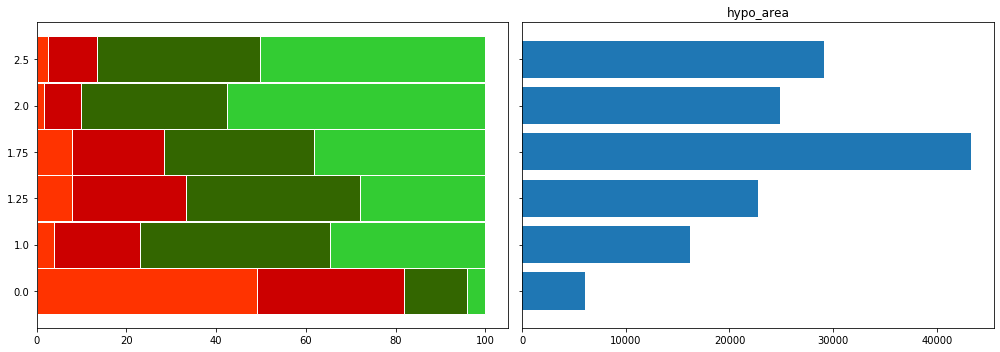

In [47]:
df1 = bike_data["cp"].copy()
df1["hypo_area"] = df1["RVA-Breite"]/2 + df1["Tr_li-Breite"]
df2 = bike_data["ms"].copy()
df2["hypo_area"] = df2["RVA-Breite"]/2 + df2["Tr_re-Breite"]
df = df1.append(df2)
likert_plot(df[["hypo_area", "rating"]])

# Nutzergruppenspezifische Hypothesen

### 1. Je öfter Fahrrad gefahren wird, desto mehr Situationen werden als sicher empfunden.

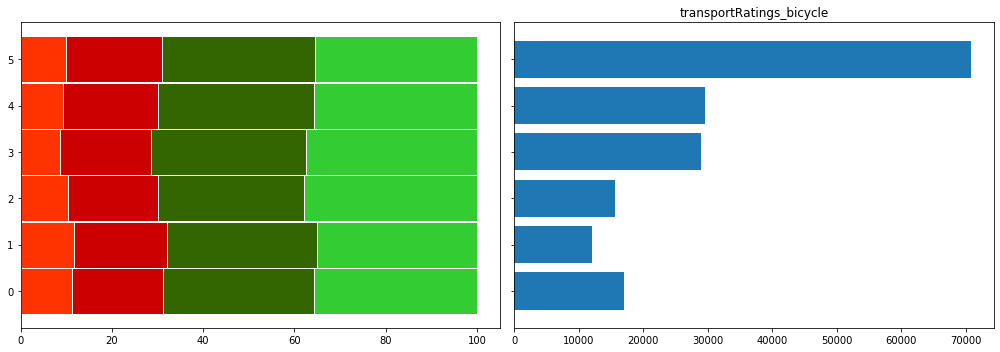

<Figure size 432x288 with 0 Axes>

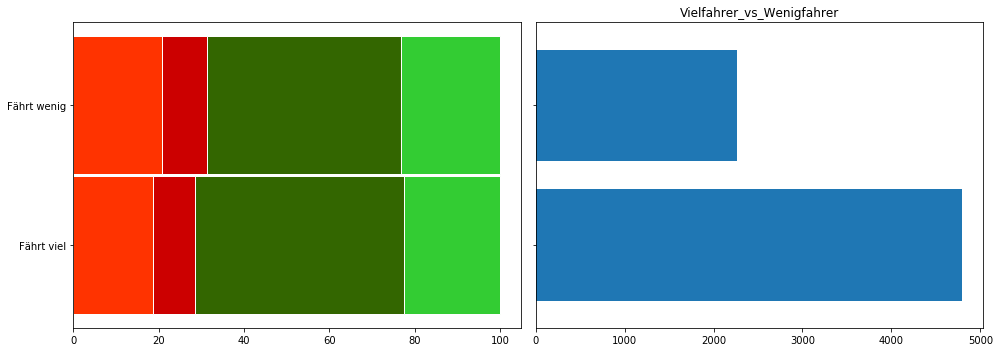

Mittelwert von  Fährt viel - 2.1049228201919066
Mittelwert von  Fährt wenig - 2.0942188879082084
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Fährt viel zu Fährt wenig (in Prozent) 0.51111812358782
Ist der Unterschied signifikant? True
Ergebnis Likelihood Ratio Test: Kein Signifikanter Unterschied


In [78]:
df = bike_data["cp"].copy().append(bike_data["ms"], sort=False).append(bike_data["se"], sort=False)
likert_plot(df[["transportRatings_bicycle", "rating"]], filename_prefix="Bike Use")
group1 = df[df["transportRatings_bicycle"] > 4][["rating", "sessionID"]]
group2 = df[df["transportRatings_bicycle"] <= 2]
group2 = group2[group2["transportRatings_bicycle"] != 0][["rating", "sessionID"]]

test_hypothesis(group1, group2, "Vielfahrer_vs_Wenigfahrer", ["Fährt viel", "Fährt wenig"])
build_likelihood_ratio_test(df, "transportRatings_bicycle")

### 2. Je weiter die mit dem Fahrrad zurückgelegte Distanz, desto mehr Situationen werden als sicher empfunden.

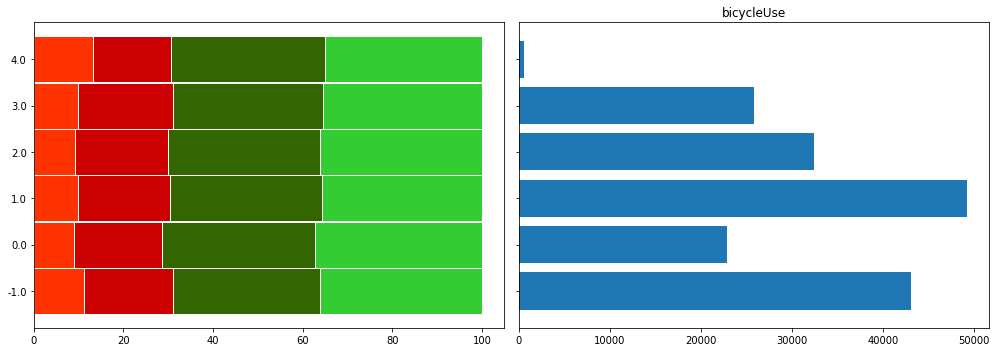

<Figure size 432x288 with 0 Axes>

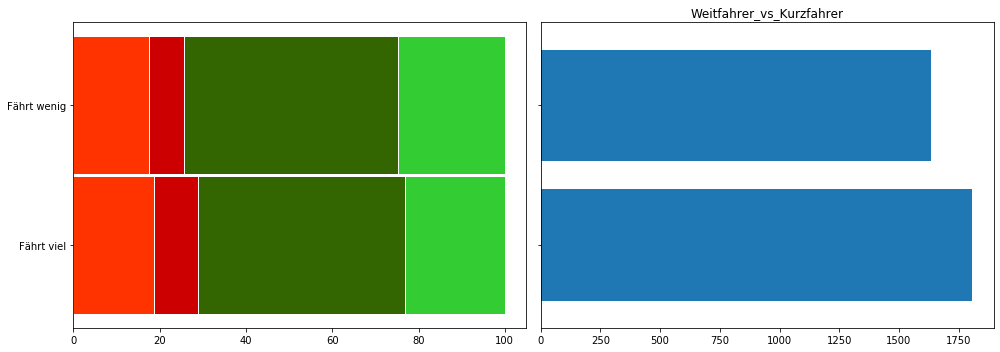

Mittelwert von  Fährt viel - 2.0930232558139537
Mittelwert von  Fährt wenig - 2.1583129584352077
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Fährt viel zu Fährt wenig (in Prozent) -3.025034083499619
Ist der Unterschied signifikant? True


In [79]:
df = bike_data["cp"].copy().append(bike_data["ms"], sort=False).append(bike_data["se"], sort=False)
likert_plot(df[["bicycleUse", "rating"]], filename_prefix="Bike Distance")
group1 = df[df["bicycleUse"] == 3][["rating", "sessionID"]]
group2 = df[df["bicycleUse"] == 0][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Weitfahrer_vs_Kurzfahrer", ["Fährt viel", "Fährt wenig"])

### 3. Ab einem gewissen Alter, werden weniger Situationen als sicher empfunden.

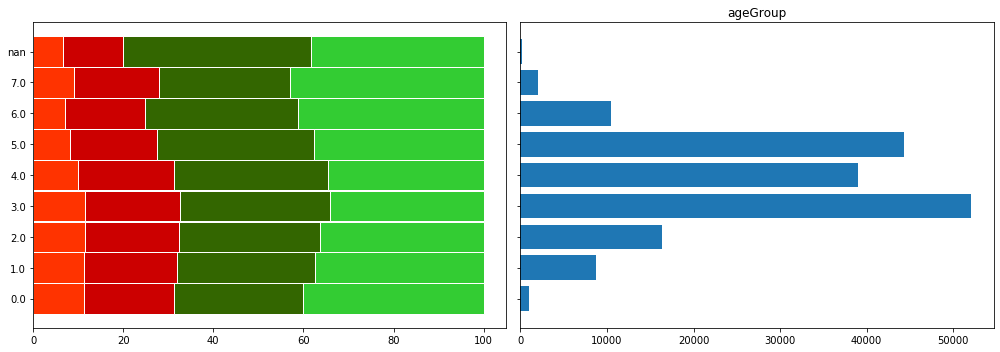

<Figure size 432x288 with 0 Axes>

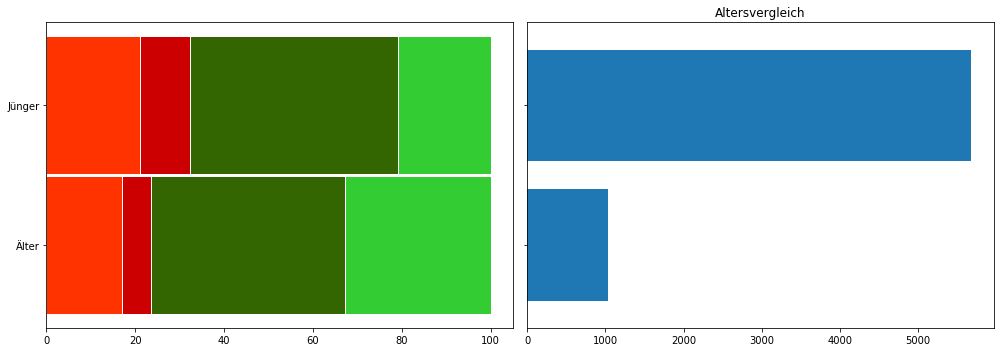

Mittelwert von  Älter - 2.243478260869565
Mittelwert von  Jünger - 2.065393416651998
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Älter zu Jünger (in Prozent) 8.622320705671783
Ist der Unterschied signifikant? True


In [108]:
df = bike_data["cp"].copy().append(bike_data["ms"], sort=False).append(bike_data["se"], sort=False)
likert_plot(df[["ageGroup", "rating"]], filename_prefix="Age")
group1 = df[df["ageGroup"] >= 6][["rating", "sessionID"]]
group2 = df[df["ageGroup"] <= 3][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Altersvergleich", ["Älter", "Jünger"])

### 4. Bis zu einem gewissen Alter, werden weniger Situationen als sicher empfunden.

<Figure size 432x288 with 0 Axes>

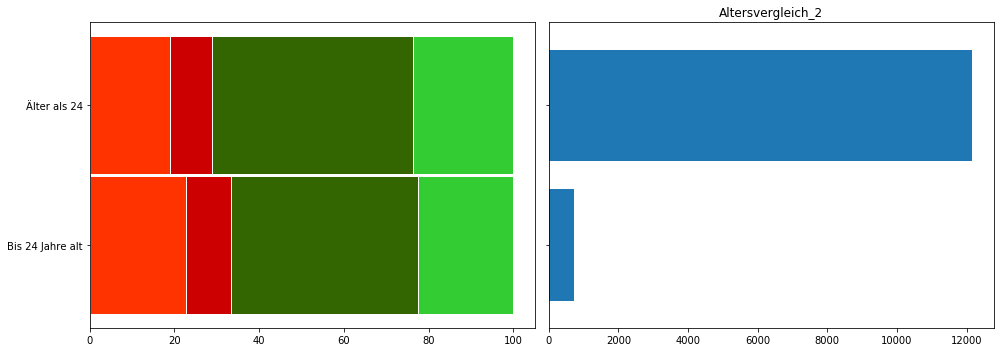

Mittelwert von  Bis 24 Jahre alt - 2.0945378151260505
Mittelwert von  Älter als 24 - 2.1117593886104036
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Bis 24 Jahre alt zu Älter als 24 (in Prozent) -0.8155083186671812
Ist der Unterschied signifikant? True


In [109]:
# look at likert_plot above
df = bike_data["cp"].copy().append(bike_data["ms"], sort=False).append(bike_data["se"], sort=False)
group1 = df[df["ageGroup"] <= 1][["rating", "sessionID"]]
group2 = df[df["ageGroup"] >= 2][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Altersvergleich_2", ["Bis 24 Jahre alt", "Älter als 24"])

### 5. Bei Befahrung mit Kindern (als Mitfahrer), werden weniger Situationen als sicher empfunden.

<Figure size 432x288 with 0 Axes>

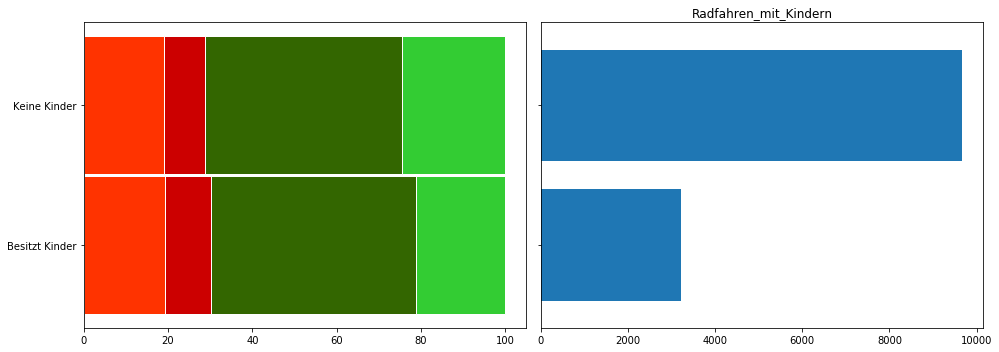

Mittelwert von  Besitzt Kinder - 2.0780373831775703
Mittelwert von  Keine Kinder - 2.1216789000310143
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Besitzt Kinder zu Keine Kinder (in Prozent) -2.056933160470519
Ist der Unterschied signifikant? True
Ergebnis Likelihood Ratio Test: Signifikanter Unterschied


In [110]:
df = bike_data["cp"].copy().append(bike_data["ms"], sort=False).append(bike_data["se"], sort=False)
group1 = df[df["hasChildren"] == 1][["rating", "sessionID"]]
group2 = df[df["hasChildren"] == 0][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radfahren_mit_Kindern", ["Besitzt Kinder", "Keine Kinder"])
build_likelihood_ratio_test(df, "hasChildren")

### 8. Nutzer aus innerstädtischen Bezirken empfinden mehr Situationen als sicher.

<Figure size 432x288 with 0 Axes>

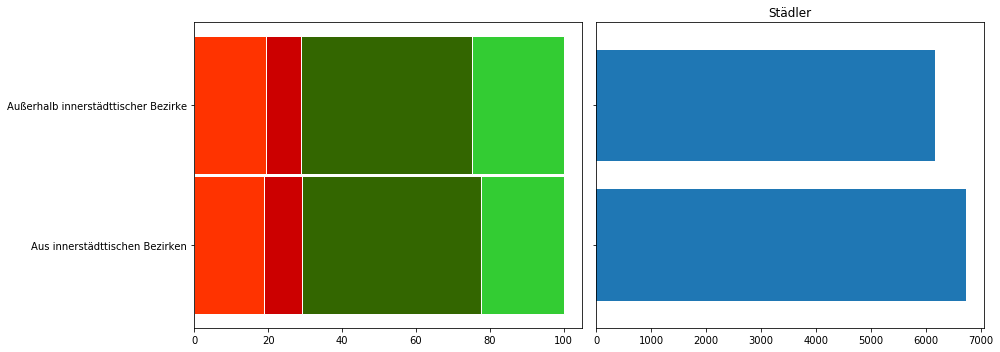

Mittelwert von  Aus innerstädttischen Bezirken - 2.0997621171573
Mittelwert von  Außerhalb innerstädttischer Bezirke - 2.1231754784301007
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Aus innerstädttischen Bezirken zu Außerhalb innerstädttischer Bezirke (in Prozent) -1.1027520575036402
Ist der Unterschied signifikant? True


In [111]:
candidates = [10117, 10178, 10115, 10119, 10405, 10249, 10407, 10247, 10245, 10243, 10179, 10969, 10961,
              10967, 10965, 12101, 10963, 10785, 10829, 12051, 12053, 12049, 12057, 12055, 12059, 12045,
              12043, 12047, 10999, 10997, 10783, 10827, 10823, 10825, 10715, 10779, 10781, 10777, 10787,
              10789, 10717, 10713, 10585, 10627, 10625, 10623, 10719, 10707, 10629, 10709, 14057, 14059,
              10589, 10553, 10551, 13353, 13347, 13357, 13355, 10439, 10409, 10437, 10435, 10559, 10557,
              10587, 10555, 10711, 12435]

def search_func(col):
    matches = col in candidates 
    return matches

df = bike_data["cp"].copy().append(bike_data["ms"], sort=False).append(bike_data["se"], sort=False)
df["in_out"] = df["zipcode"].apply(search_func)
df["in_out"].value_counts()
group1 = df[df["in_out"] == True][["rating", "sessionID"]]
group2 = df[df["in_out"] == False][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Städler", ["Aus innerstädttischen Bezirken", "Außerhalb innerstädttischer Bezirke"])

# Seitenraumhypothesen

### 1. Das Vorhandensein einer Trennung zwischen RVA und Fußgängerverkehr, wird stets als sicherer empfunden.

<Figure size 432x288 with 0 Axes>

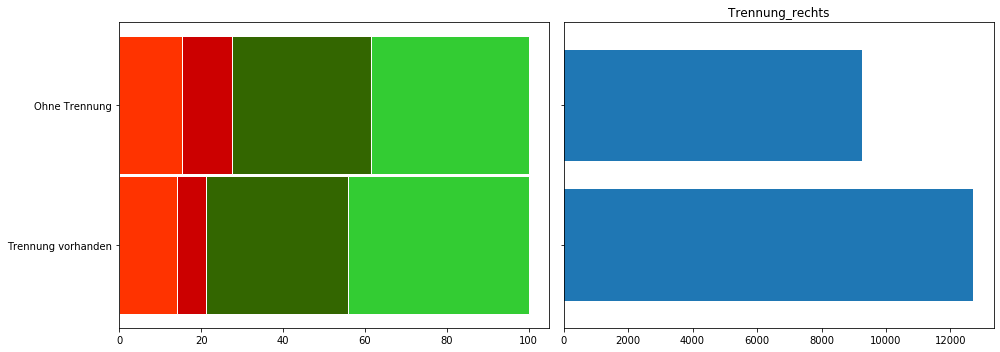

Mittelwert von  Trennung vorhanden - 2.3638403401039207
Mittelwert von  Ohne Trennung - 2.2300995024875623
Bootstrap Ergebnis: 25.0    (25.0, 25.0)
Unterschied im Mittelwert von Trennung vorhanden zu Ohne Trennung (in Prozent) 5.997079388932081
Ist der Unterschied signifikant? True
Ergebnis Likelihood Ratio Test: Signifikanter Unterschied


In [112]:
df = bike_data["cp"].copy()
group1 = df[df["Tr_re-Art"] != "-"][["rating", "sessionID"]]
group2 = df[df["Tr_re-Art"] == "-"][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Trennung_rechts", ["Trennung vorhanden", "Ohne Trennung"])
build_likelihood_ratio_test(df, "Tr_re-Art")

### 2. Bei Vorhandensein von Cafés, Auslagen und einem hohen Fußverkehrsanteil, wird die Situationen immer als unsicher empfunden, wenn die RVA schmal ist.

<Figure size 432x288 with 0 Axes>

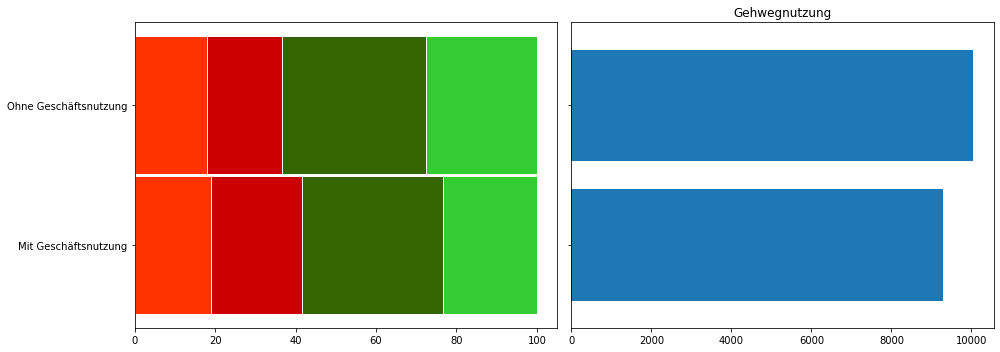

Mittelwert von  Mit Geschäftsnutzung - 1.8798620838271738
Mittelwert von  Ohne Geschäftsnutzung - 1.9984578648890658
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Mit Geschäftsnutzung zu Ohne Geschäftsnutzung (in Prozent) -5.934364849292196
Ist der Unterschied signifikant? True
Ergebnis Likelihood Ratio Test: Signifikanter Unterschied


In [113]:
# Only Geschäftsnutzung available
df = bike_data["cp"].copy()
df = df[df["RVA-Breite"] == 2]
group1 = df[df["GW-Geschäftsnutzung"] == "ja"][["rating", "sessionID"]]
group2 = df[df["GW-Geschäftsnutzung"] != "ja"][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Gehwegnutzung", ["Mit Geschäftsnutzung", "Ohne Geschäftsnutzung"])
build_likelihood_ratio_test(df, "GW-Geschäftsnutzung")

### 3. Je mehr Fläche zwischen Mittelpunkt der RVA und den Seitenspiegeln des ruhenden KFZ- Verkehr oder dem Fußgängerv Verkehr vorhanden ist, desto sicherer wird die RVA empfunden.

In [114]:
# 

### 4. Eine Trennung zum Fußgängerverkehr mit einem Grünstreifen wird als sicher empfunden.

<Figure size 432x288 with 0 Axes>

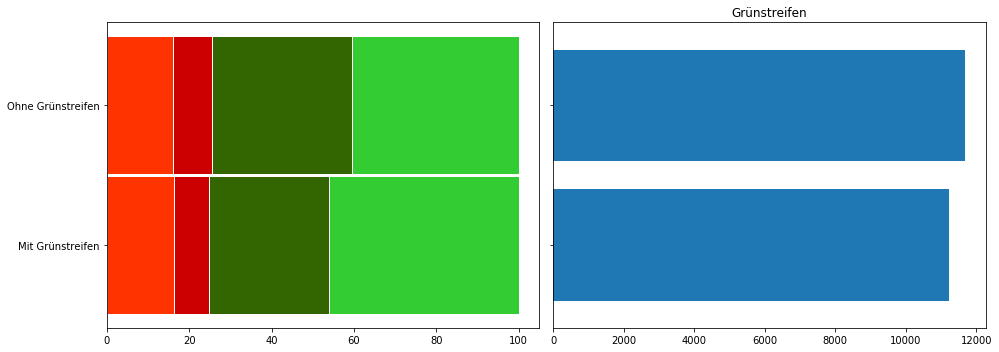

Mittelwert von  Mit Grünstreifen - 2.3549852980486503
Mittelwert von  Ohne Grünstreifen - 2.2956704030118935
Bootstrap Ergebnis: 25.0    (25.0, 50.0)
Unterschied im Mittelwert von Mit Grünstreifen zu Ohne Grünstreifen (in Prozent) 2.583772259246638
Ist der Unterschied signifikant? True


In [115]:
df = bike_data["cp"].copy()
group1 = df[df["Tr_re-Art"] == "Grünstreifen"][["rating", "sessionID"]]
group2 = df[df["Tr_re-Art"] == "Aufpflasterung"][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Grünstreifen", ["Mit Grünstreifen", "Ohne Grünstreifen"])

# Nebenstraßenhypothesen

### 1. Einbahnstraßen werden als sicher empfunden.

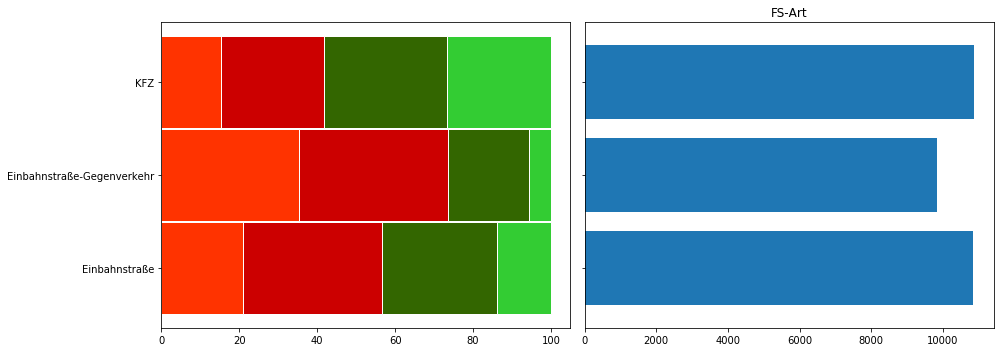

<Figure size 432x288 with 0 Axes>

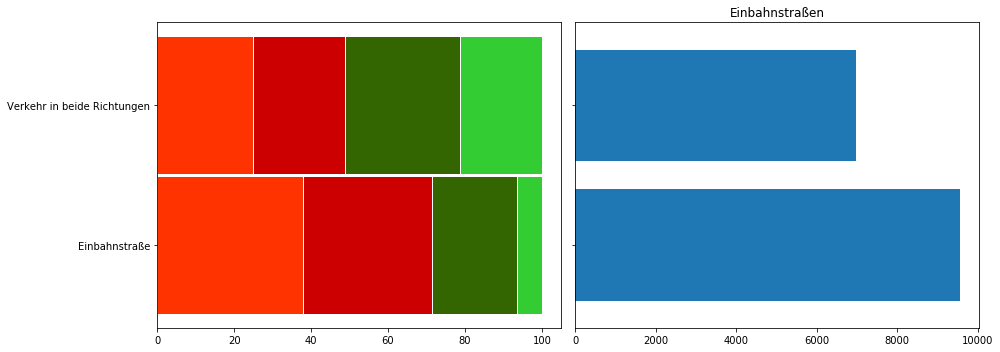

Mittelwert von  Einbahnstraße - 1.1579552582061468
Mittelwert von  Verkehr in beide Richtungen - 1.6849226804123711
Bootstrap Ergebnis: -50.0    (-50.0, -50.0)
Unterschied im Mittelwert von Einbahnstraße zu Verkehr in beide Richtungen (in Prozent) -31.27546612864475
Ist der Unterschied signifikant? True


In [116]:
df = bike_data["se"].copy()
likert_plot(df[["FS-Art", "rating"]])
group1 = df[(df["FS-Art"] == "Einbahnstraße") | (df["FS-Art"] == "Einbahnstraße-Gegenverkehr")][["rating", "sessionID"]]
group2 = df[df["FS-Art"] == "KFZ"][["rating", "sessionID"]]#
test_hypothesis(group1, group2, "Einbahnstraßen", ["Einbahnstraße", "Verkehr in beide Richtungen"])

### 2. In Gegenrichtung freigegebene Einbahnstraßen werden als sicher empfunden.

<Figure size 432x288 with 0 Axes>

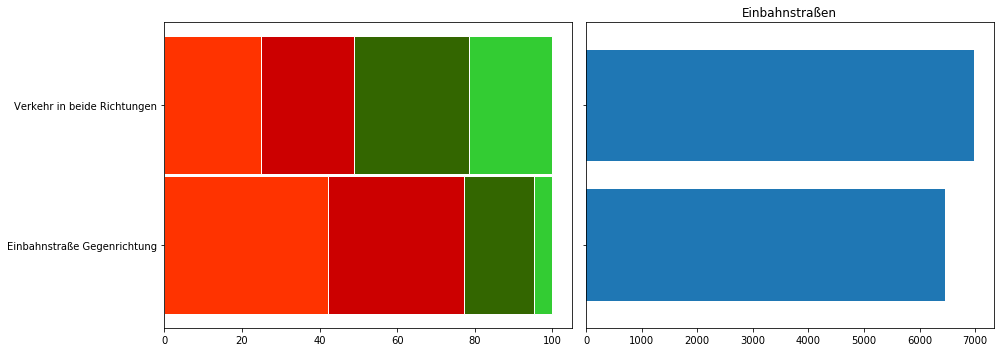

Mittelwert von  Einbahnstraße Gegenrichtung - 0.9686823383854005
Mittelwert von  Verkehr in beide Richtungen - 1.6849226804123711
Bootstrap Ergebnis: -50.0    (-50.0, -50.0)
Unterschied im Mittelwert von Einbahnstraße Gegenrichtung zu Verkehr in beide Richtungen (in Prozent) -42.508795825080625
Ist der Unterschied signifikant? True


In [117]:
group1 = df[df["FS-Art"] == "Einbahnstraße-Gegenverkehr"][["rating", "sessionID"]]
group2 = df[df["FS-Art"] == "KFZ"][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Einbahnstraßen", ["Einbahnstraße Gegenrichtung",
                                             "Verkehr in beide Richtungen"])

### 3. Wird eine RVA auf Hauptverkehrsstraßen als sicher empfunden, wird diese auch auf Nebenstraßen als sicher empfunden.

In [118]:
# how to compare RVA from SE to MS?

### 4. Eindeutig auf der Fahrbahn markierte Fahrradstraßen (großes Fahrradstraßensymbol + grüne Mittellinie) werden als sicherer empfunden, als Fahrradstraßen die nur beschildert sind. 

<Figure size 432x288 with 0 Axes>

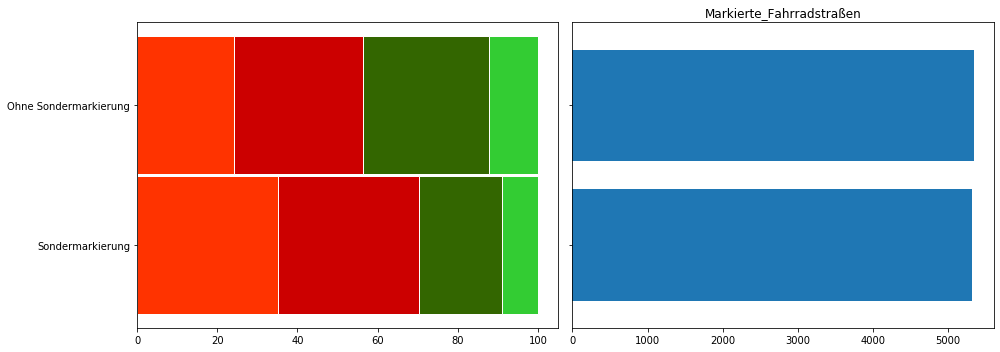

Mittelwert von  Sondermarkierung - 1.1289746001881467
Mittelwert von  Ohne Sondermarkierung - 1.4466928986321903
Bootstrap Ergebnis: -33.333333333333336    (-66.66666666666667, -33.333333333333336)
Unterschied im Mittelwert von Sondermarkierung zu Ohne Sondermarkierung (in Prozent) -21.961696137752377
Ist der Unterschied signifikant? True


In [119]:
df = bike_data["se"].copy()
group1 = df[df["besondere Merkmale"] == "Fahrradstraße-Sondermarkierung"][["rating", "sessionID"]]
group2 = df[df["besondere Merkmale"] == "Fahrradstraße"][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Markierte_Fahrradstraßen", ["Sondermarkierung", "Ohne Sondermarkierung"])

# Hauptstraßenhypothesen

### 1. Hauptverkehrsstraßen mit einem Geschwindigkeitslimit von 30 km/h statt 50 km/h werden als sicherer empfunden. 

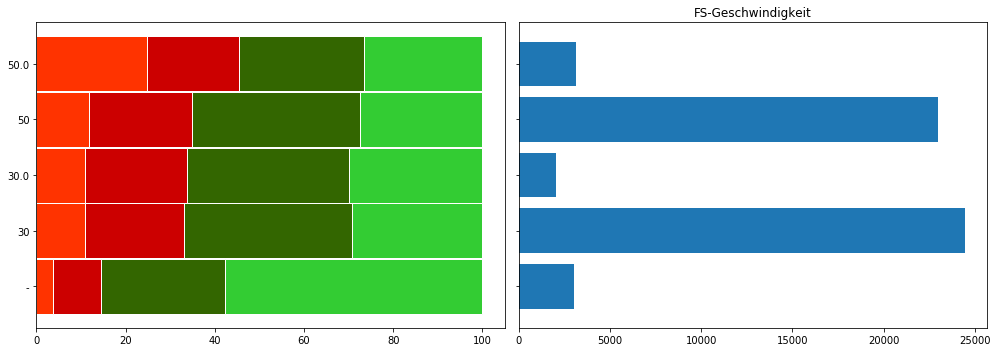

In [120]:
df = bike_data["ms"].copy()
likert_plot(df[["FS-Geschwindigkeit", "rating"]])

### 2. Eine Bordsteinkante als Begrenzungsstreifen direkt an einer schmalender RVA, wird als weniger sicher empfunden.

In [121]:
# Where can i find Bordsteinkante?

### 3. Ein Sicherheitstrennstreifen zwischen dem Radverkehr und Parken wird als sicherer empfunden.

<Figure size 432x288 with 0 Axes>

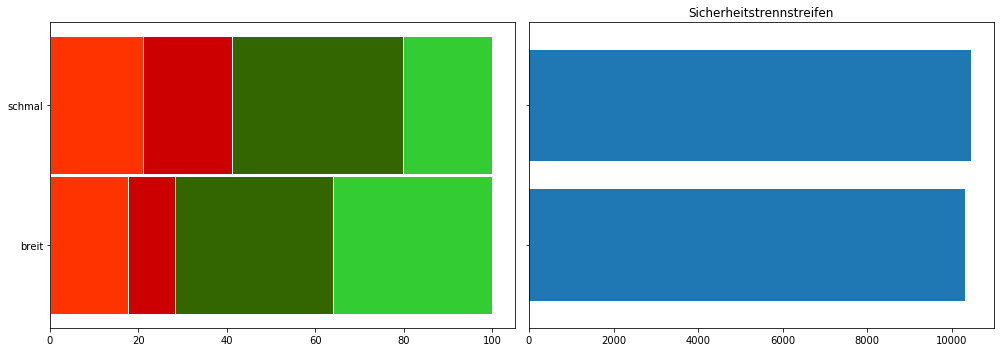

Mittelwert von  breit - 2.2189922480620154
Mittelwert von  schmal - 1.8701491110686292
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von breit zu schmal (in Prozent) 18.653225827220396
Ist der Unterschied signifikant? True


In [136]:
# including Sperrfläche
df = bike_data["ms"]
group1 = df[df["Tr_li-Breite"] == 0.75][["rating", "sessionID"]]
group2 = df[df["Tr_li-Breite"] == 0.25][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Sicherheitstrennstreifen", ["breit", "schmal"])

### 4. Eine größere nutzbare Fläche zwischen Tram und ruhendem Verkehr wird als sicherer empfunden.

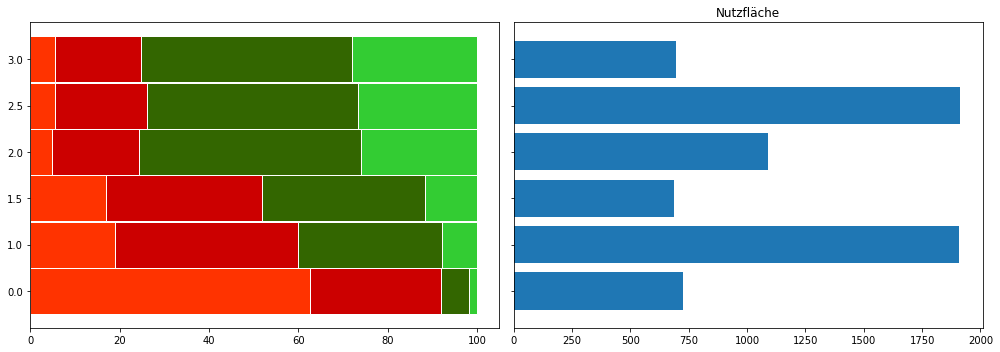

In [137]:
# trying out to define that
df = bike_data["ms"].copy()
df = df[df["Parken"] != "-"]
df = df[df["FS-Art"] == "Tram"]
likert_plot(df[["Nutzfläche", "rating"]])

### 5. Eine durchgezogene Markierung der RVA wird als sicherer empfunden.

<Figure size 432x288 with 0 Axes>

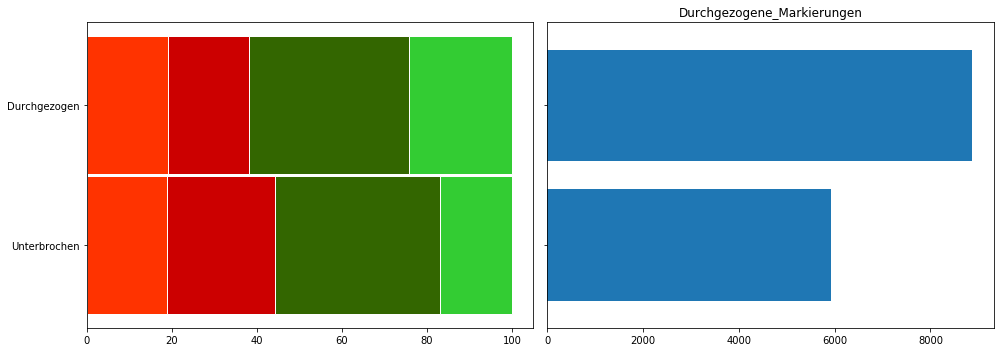

Mittelwert von  Unterbrochen - 1.7078481012658229
Mittelwert von  Durchgezogen - 1.9357255520504733
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Unterbrochen zu Durchgezogen (in Prozent) -11.77219831309581
Ist der Unterschied signifikant? True


In [138]:
df = bike_data["ms"].copy()
group1 = df[df["Tr_li-Markierung"] == "unterbrochen"][["rating", "sessionID"]]
group2 = df[df["Tr_li-Markierung"] == "durchgezogen"][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Durchgezogene_Markierungen", ["Unterbrochen","Durchgezogen"])

### 6. RVA ohne rechtsseitiges Parken werden als sicher empfunden.

<Figure size 432x288 with 0 Axes>

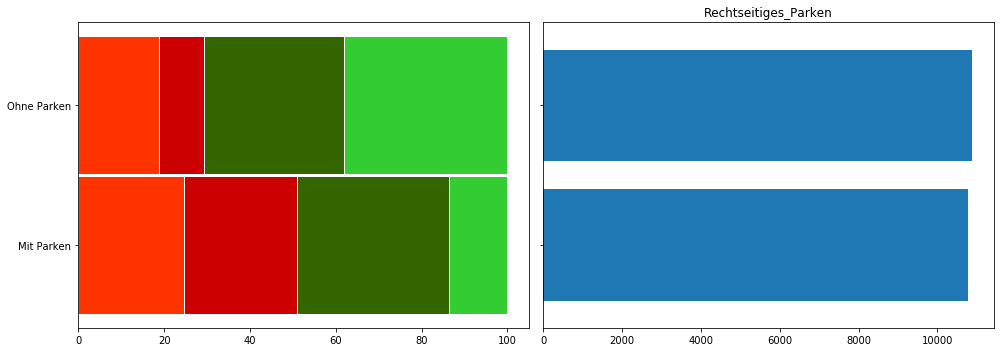

Mittelwert von  Mit Parken - 1.636059790177328
Mittelwert von  Ohne Parken - 2.2101296075006895
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Mit Parken zu Ohne Parken (in Prozent) -25.974486535771298
Ist der Unterschied signifikant? True


In [139]:
df = bike_data["ms"]
group1 = df[df["Parken"] != "-"][["rating", "sessionID"]]
group2 = df[df["Parken"] == "-"][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Rechtseitiges_Parken", ["Mit Parken", "Ohne Parken"])

### 7. Freigegebene Bussonderfahrstreifen werden ab einer Breite von XX als sicher empfunden.

<Figure size 432x288 with 0 Axes>

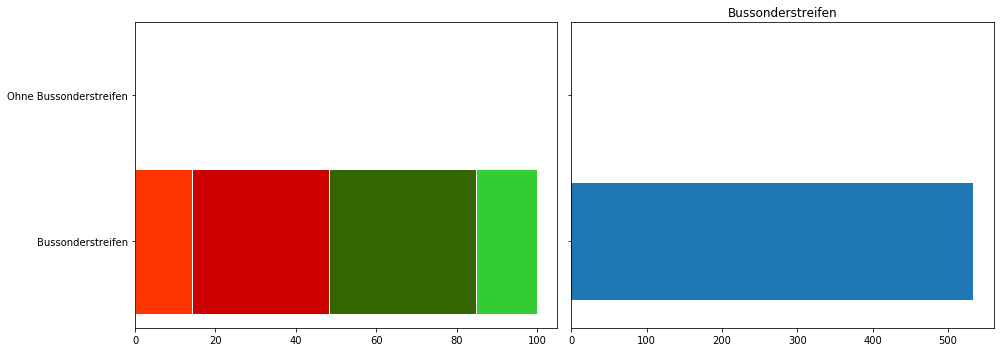

Mittelwert von  Bussonderstreifen - 1.5411985018726593
Mittelwert von  Ohne Bussonderstreifen - nan
Bootstrap Ergebnis: nan    (nan, nan)
Unterschied im Mittelwert von Bussonderstreifen zu Ohne Bussonderstreifen (in Prozent) nan
Ist der Unterschied signifikant? False


In [140]:
df = bike_data["ms"]
group1 = df[df["FS-Art"] == "Bus"][["rating", "sessionID"]]
group2 = df[df["FS-Art"] == "KFZ"][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Bussonderstreifen", ["Bussonderstreifen", "Ohne Bussonderstreifen"])

### 8. Radfahrstreifen werden als sicher empfunden. 

<Figure size 432x288 with 0 Axes>

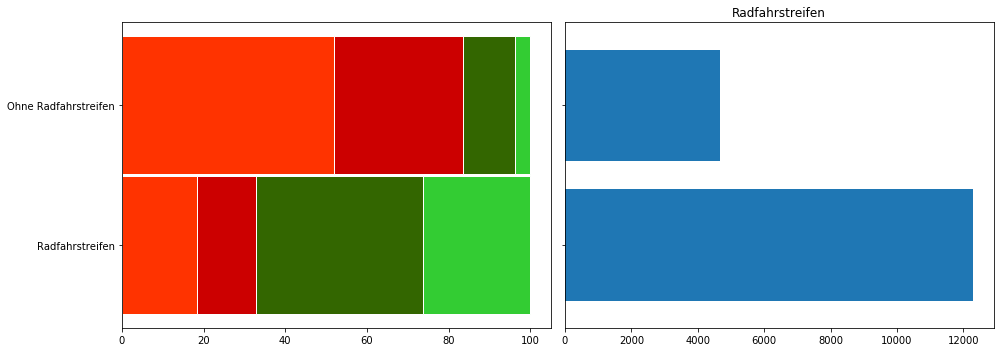

Mittelwert von  Radfahrstreifen - 2.0624339054746605
Mittelwert von  Ohne Radfahrstreifen - 0.7402876153681047
Bootstrap Ergebnis: 100.0    (-100.0, 100.0)
Unterschied im Mittelwert von Radfahrstreifen zu Ohne Radfahrstreifen (in Prozent) 178.5990016122483
Ist der Unterschied signifikant? False


In [141]:
df = bike_data["ms"]
group1 = df[df["RVA-Lage"] != "-"][["rating", "sessionID"]]
group2 = df[df["RVA-Lage"] == "-"][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Radfahrstreifen", ["Radfahrstreifen", "Ohne Radfahrstreifen"])

### 9. Schutzstreifen werden als sicher empfunden.

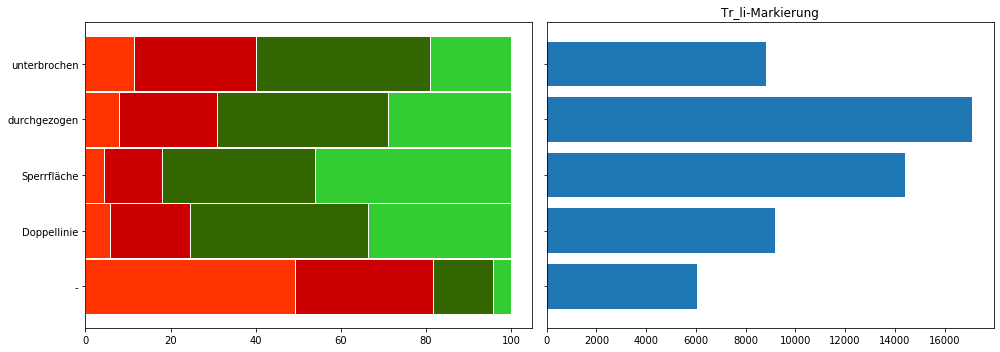

In [142]:
df = bike_data["ms"]
likert_plot(df[["Tr_li-Markierung", "rating"]])

### 10. Ab einer gewissen Verkehrsstärke werden nur Radfahrstreifen als sicher empfunden.

<Figure size 432x288 with 0 Axes>

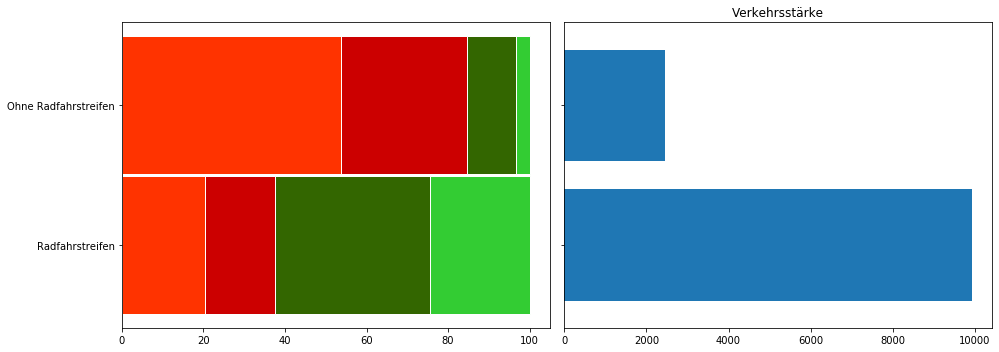

Mittelwert von  Radfahrstreifen - 1.9744157937147462
Mittelwert von  Ohne Radfahrstreifen - 0.6742857142857143
Bootstrap Ergebnis: inf    (nan, inf)
Unterschied im Mittelwert von Radfahrstreifen zu Ohne Radfahrstreifen (in Prozent) 192.81590161023783
Ist der Unterschied signifikant? False


In [143]:
df = bike_data["ms"].copy()
df = df[df["FS-Aufkommen"] == "viel"]
group1 = df[df["RVA-Lage"] != "-"][["rating", "sessionID"]]
group2 = df[df["RVA-Lage"] == "-"][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Verkehrsstärke", ["Radfahrstreifen", "Ohne Radfahrstreifen"])

### 11. Ab einer gewissen Verkehrsstärke werden nur Protected Bbike Llanes als sicher empfunden.

<Figure size 432x288 with 0 Axes>

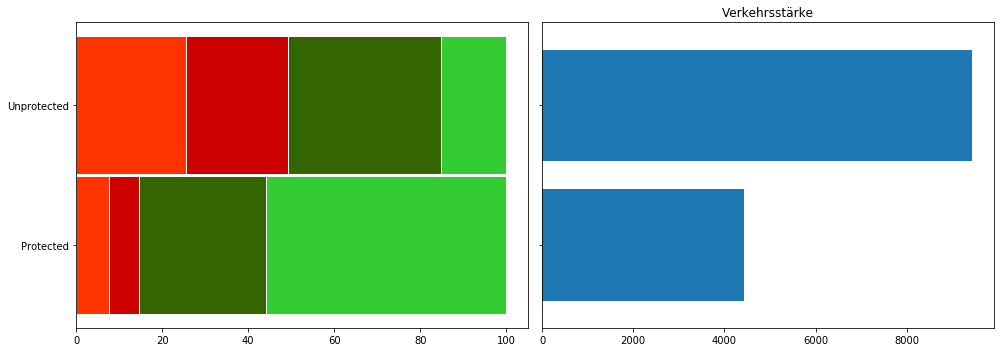

Mittelwert von  Protected - 2.4801712483100498
Mittelwert von  Unprotected - 1.6512195121951219
Bootstrap Ergebnis: 50.0    (50.0, 50.0)
Unterschied im Mittelwert von Protected zu Unprotected (in Prozent) 50.202394653932124
Ist der Unterschied signifikant? True


In [144]:
df = bike_data["ms"].copy()
df = df[df["FS-Aufkommen"] == "viel"]
group1 = df[df["Tr_li-baulTrennung"] != "-"][["rating", "sessionID"]]
group2 = df[df["Tr_li-baulTrennung"] == "-"][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Verkehrsstärke", ["Protected", "Unprotected"])

### 12. Bei vorhandenem rechtsseitigem Parken muss die Breite der RVA XX. cm breiter sein um als gleich sicher empfunden zu werden.

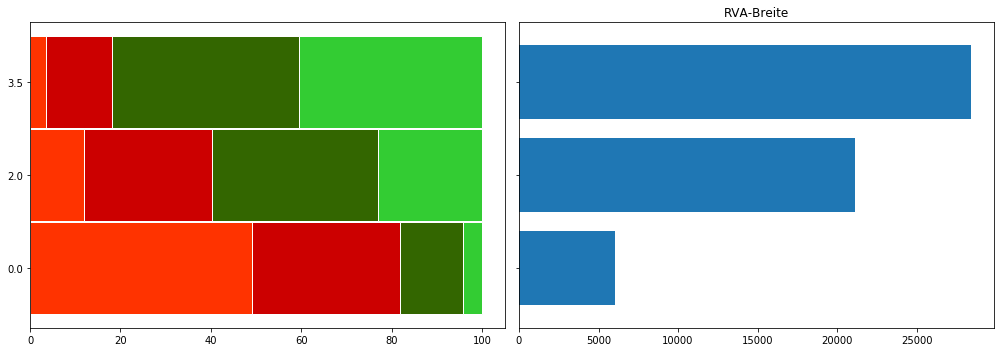

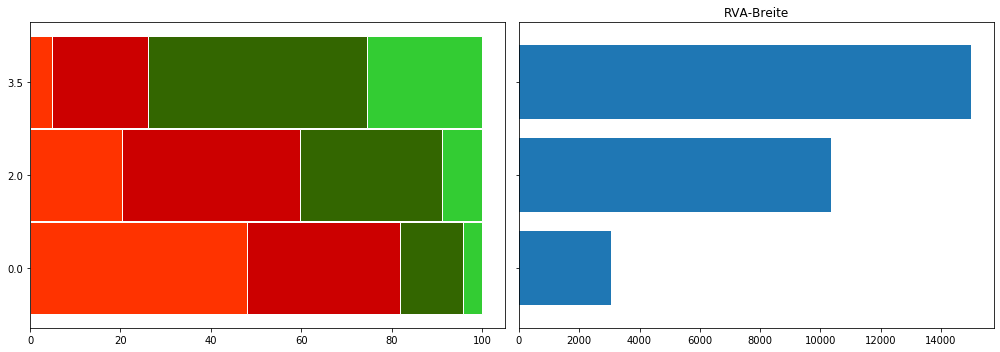

In [145]:
df = bike_data["ms"].copy()
likert_plot(df[["RVA-Breite", "rating"]])
df = df[df["Parken"] != "-"]
likert_plot(df[["RVA-Breite", "rating"]])


### 13. Breite RVA mit Doppelter Linie / Sperrzone links werden immer als sicher empfunden 

<Figure size 432x288 with 0 Axes>

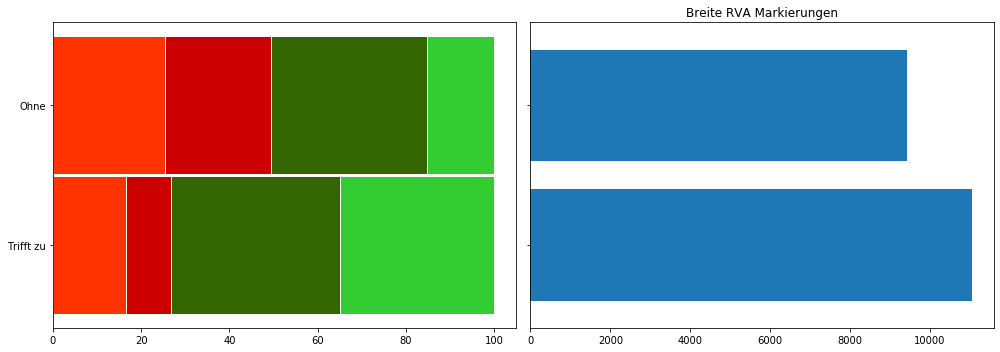

Mittelwert von  Trifft zu - 2.228100371410454
Mittelwert von  Ohne - 1.6512195121951219
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Trifft zu zu Ohne (in Prozent) 34.93665469398614
Ist der Unterschied signifikant? True


In [146]:
df = bike_data["ms"].copy()
df = df[df["RVA-Breite"] == 3.5]
group1 = df[(df["Tr_li-Markierung"] == "Doppellinie") | (df["Tr_li-Markierung"] == "Sperrfläche")][["rating", "sessionID"]]
group1 = df[(df["Tr_li-Markierung"] != "Doppellinie") | (df["Tr_li-Markierung"] != "Sperrfläche")][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Breite RVA Markierungen", ["Trifft zu", "Ohne"])

### 14. Die Trennung einer RVA mittels Blumenkübel wird als sicher empfunden. 

<Figure size 432x288 with 0 Axes>

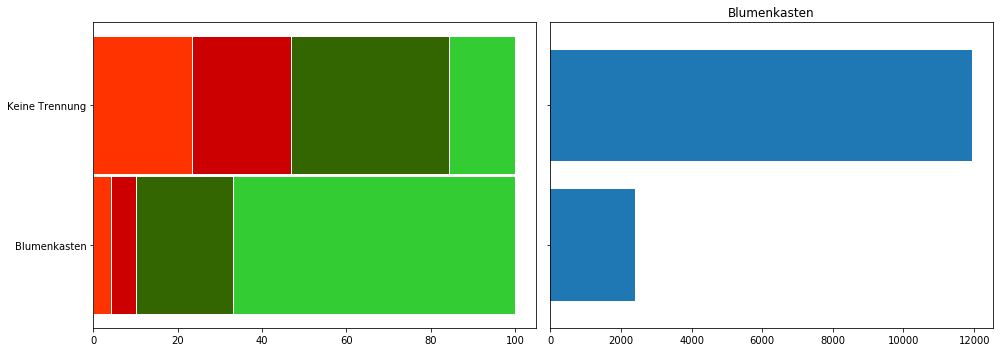

Mittelwert von  Blumenkasten - 2.5863731656184488
Mittelwert von  Keine Trennung - 1.7201323726541555
Bootstrap Ergebnis: 50.0    (50.0, 50.0)
Unterschied im Mittelwert von Blumenkasten zu Keine Trennung (in Prozent) 50.35896113202545
Ist der Unterschied signifikant? True


In [147]:
df = bike_data["ms"].copy()
group1 = df[df["Tr_li-baulTrennung"] == "Blumenkasten"][["rating", "sessionID"]]
group2 = df[df["Tr_li-baulTrennung"] == "-"][["rating", "sessionID"]]
test_hypothesis(group1, group2, "Blumenkasten", ["Blumenkasten", "Keine Trennung"])

### 15. Die Nutzung von Blumenkübel anstatt Pollern wird als sicherer empfunden.

<Figure size 432x288 with 0 Axes>

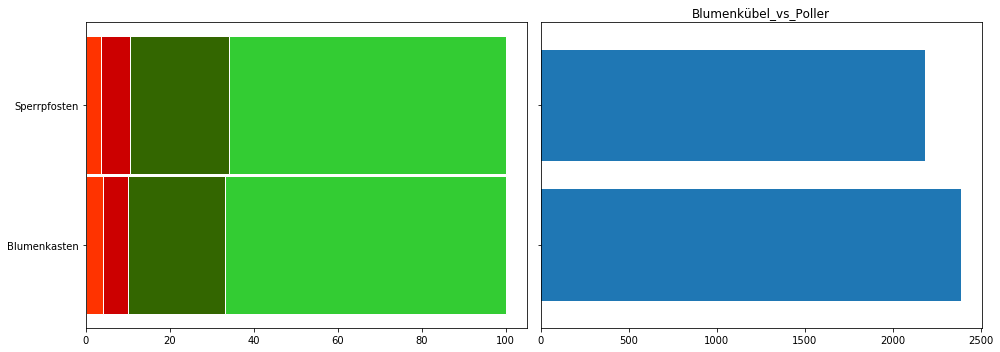

Mittelwert von  Blumenkasten - 2.5863731656184488
Mittelwert von  Sperrpfosten - 2.553113553113553
Bootstrap Ergebnis: 0.0    (0.0, 0.0)
Unterschied im Mittelwert von Blumenkasten zu Sperrpfosten (in Prozent) 1.3027079216408273
Ist der Unterschied signifikant? True


In [148]:
df = bike_data["ms"].copy()
group1 = df[df["Tr_li-baulTrennung"] == "Blumenkasten"][["rating", "sessionID"]]#.rename("Blumenkasten")
group2 = df[(df["Tr_li-baulTrennung"] == "Sperrpfosten-hoch")][["rating", "sessionID"]]#.rename("Blumenkasten")
test_hypothesis(group1, group2, "Blumenkübel_vs_Poller", ["Blumenkasten", "Sperrpfosten"])

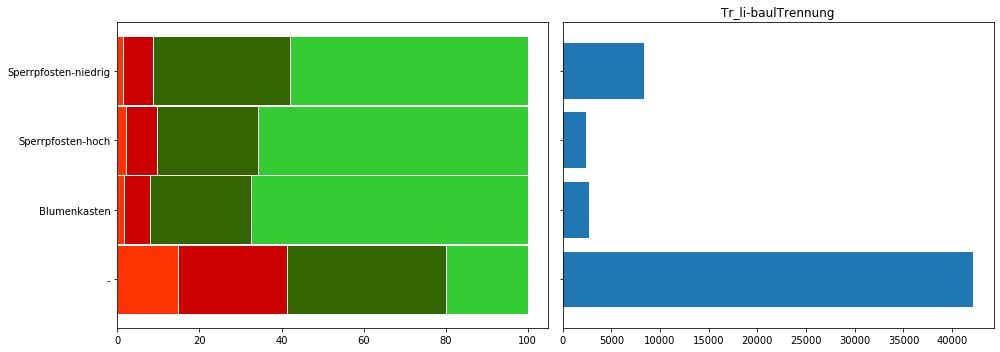

In [149]:
likert_plot(df[["Tr_li-baulTrennung", "rating"]])